# Proyecto Introducción a la Ciencia de los Datos
**José Barrios - 20007192**

## Descripción general
El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoyándose de referencias adicionales útiles) para crear modelos predictivos de regresión lineal uni-variable sencillos de la forma:
> y = f(x) = mx +b

Donde:
<br>y = la variable dependiente
<br>x = variable independiente
<br>m = pendiente de la recta(parámetro del modelo)
<br>b = intercepto(parámetro del modelo)

Tanto “x” como “y” son parte del dataset usado , “m” y “b” son parámetros del modelo los cuales buscamos estimar con los datos, esto significa que se busca encontrar que valores de “m” y “b” producen una recta que describa de la mejor manera posible la relación entre los datos "x" y "y".

### Pasos solicitados
Los datos se encuentran dados en el formato binario de NumPy .npy por lo tanto usaremos la función “load” de numpy para poderlos utilizar:
https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html

Instalar Numpy, Pandas, Seaborn para el notebook

In [66]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr

In [2]:
data = np.load('proyecto_training_data.npy')

In [29]:
#'Revolvemos' la data para minimizar algún tipo de sesgo
#Esto reordena las filas, pero los valores en cada columna siguen siendo los mismos
np.random.shuffle(data)
data

array([[1.560e+05, 6.000e+00, 1.026e+03, 5.000e+00, 1.969e+03, 6.100e+01],
       [2.450e+05, 8.000e+00, 1.563e+03, 6.000e+00, 2.007e+03, 7.800e+01],
       [8.800e+04, 6.000e+00, 5.250e+02, 6.000e+00, 1.971e+03, 2.100e+01],
       ...,
       [3.930e+04, 1.000e+00, 3.340e+02, 2.000e+00, 1.946e+03, 5.000e+01],
       [1.299e+05, 5.000e+00, 8.640e+02, 5.000e+00, 1.958e+03, 7.000e+01],
       [2.260e+05, 7.000e+00, 1.057e+03, 7.000e+00, 2.001e+03,       nan]])

In [60]:
data = pd.DataFrame(data = data, columns = ["SalePrice", "OverallQual","1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"])
data = data.astype({"SalePrice" : int, "OverallQual" : int, "1stFlrSF" : int, "TotRmsAbvGrd" : int, "YearBuilt" : int})
data.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,156000,6,1026,5,1969,61.0
1,245000,8,1563,6,2007,78.0
2,88000,6,525,6,1971,21.0
3,174000,8,764,5,1999,24.0
4,122000,7,964,9,1910,60.0


In [61]:
data.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


Procedemos a dividir la data en dos secciones: una para entrenamiento y otra para verificación del modelo.

Así que se procede a determinar cuántas filas tiene la data y así separar el 80% de ella para entrenamiento.

In [39]:
filas_entrenamiento = int(len(data) * 0.8)

print("Forma o tamaño: ", data.shape)
print("Filas para entrenamiento: ", filas_entrenamiento)

Forma o tamaño:  (1460, 6)
Filas para entrenamiento:  1168


In [52]:
data_entrenamiento = data[:filas_entrenamiento]

print("Forma o tamaño de data de entrenamiento: ", data_entrenamiento.shape)

Forma o tamaño de data de entrenamiento:  (1168, 6)


## Análisis exploratorio
Usando numpy, calcular los siguientes valores de cada variable de la data.
* Media
* Valor máximo
* Valor mínimo
* Rango
* Desviación estándar

In [62]:
media = np.nanmean(data_entrenamiento, axis=0)
maximo = np.nanmax(data_entrenamiento, axis=0)
minimo = np.nanmin(data_entrenamiento, axis=0)
rango = maximo - minimo
destandar = np.nanstd(data_entrenamiento, axis=0)

for i in range(len(media)):
    print('******************************************')
    print(data_entrenamiento.columns[i])
    print('Media: ', media[i])
    print('Máximo: ', maximo[i])
    print('Mínimo: ', minimo[i])
    print('Rango: ', rango[i])
    print('Desviación estándar: ', destandar[i])

******************************************
SalePrice
Media:  182531.9623287671
Máximo:  755000.0
Mínimo:  34900.0
Rango:  720100.0
Desviación estándar:  80627.81867770334
******************************************
OverallQual
Media:  6.111301369863014
Máximo:  10.0
Mínimo:  1.0
Rango:  9.0
Desviación estándar:  1.379128553366383
******************************************
1stFlrSF
Media:  1165.685787671233
Máximo:  3228.0
Mínimo:  372.0
Rango:  2856.0
Desviación estándar:  382.95198213343605
******************************************
TotRmsAbvGrd
Media:  6.537671232876712
Máximo:  12.0
Mínimo:  3.0
Rango:  9.0
Desviación estándar:  1.5947104521381785
******************************************
YearBuilt
Media:  1971.6583904109589
Máximo:  2010.0
Mínimo:  1872.0
Rango:  138.0
Desviación estándar:  30.160312216979147
******************************************
LotFrontage
Media:  69.97705943691345
Máximo:  182.0
Mínimo:  21.0
Rango:  161.0
Desviación estándar:  22.19393841349466


Para cada variable en el dataset usar seaborn (función distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para graficar un histograma de la variable.

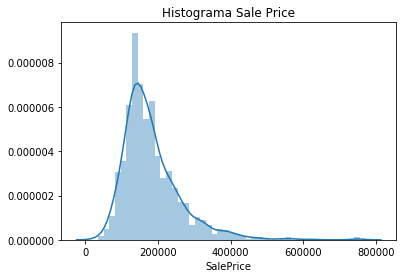

In [79]:
#SalePrice
sns.distplot(data_entrenamiento['SalePrice'])
plt.title('Histograma Sale Price')
plt.show()

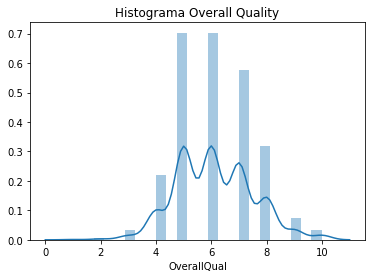

In [80]:
#OverallQual
sns.distplot(data_entrenamiento['OverallQual'])
plt.title('Histograma Overall Quality')
plt.show()

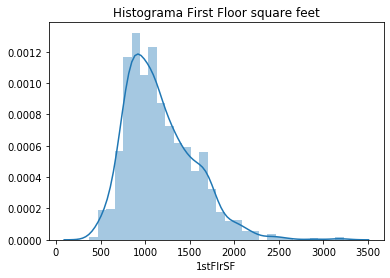

In [81]:
#1stFlrSF
sns.distplot(data_entrenamiento['1stFlrSF'])
plt.title('Histograma First Floor square feet')
plt.show()

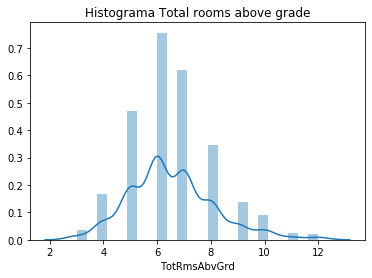

In [82]:
#TotRmsAbvGrd
sns.distplot(data_entrenamiento['TotRmsAbvGrd'])
plt.title('Histograma Total rooms above grade')
plt.show()

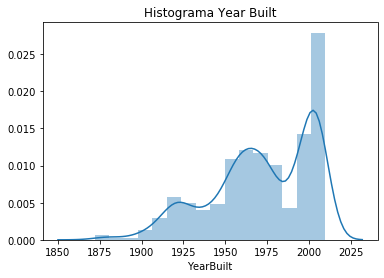

In [83]:
#YearBuilt
sns.distplot(data_entrenamiento['YearBuilt'])
plt.title('Histograma Year Built')
plt.show()

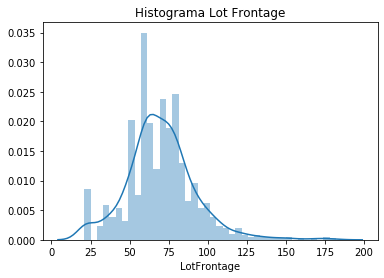

In [84]:
#LotFrontage
sns.distplot(data_entrenamiento['LotFrontage'])
plt.title('Histograma Lot Frontage')
plt.show()

### Correlación entre variables
Para cada variable independiente x:
* Calcular el coeficiente de correlación entre x y _y_ 
* Graficar x vs y (scatterplot) usando matplotlib
* Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica

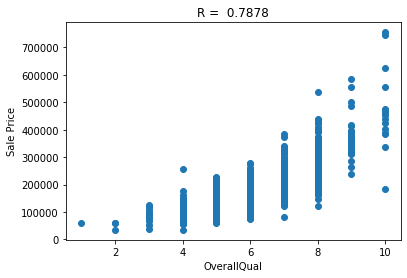

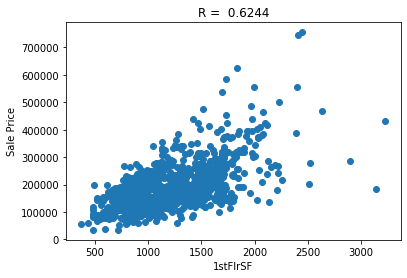

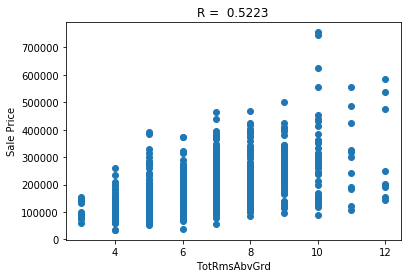

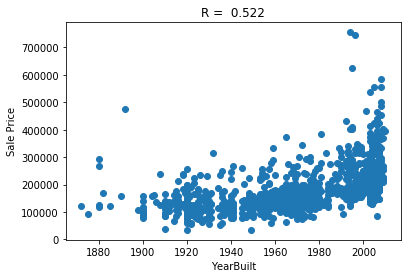

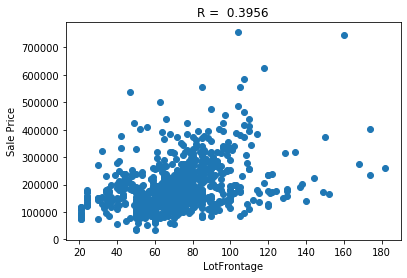

In [117]:
for col in data_entrenamiento.columns:
    if(col != 'SalePrice'):
        cor = round(data_entrenamiento['SalePrice'].corr(data_entrenamiento[col]),4)
        titulo = "R =  " + str(cor)
        
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.scatter(data_entrenamiento[col], data_entrenamiento["SalePrice"])
        ax.set_xlabel(col)
        ax.set_ylabel("Sale Price")
        ax.set_title(titulo)
        ax.set_aspect('auto')
    
plt.show()